## Machine Learning with Tree-Based Models in Python

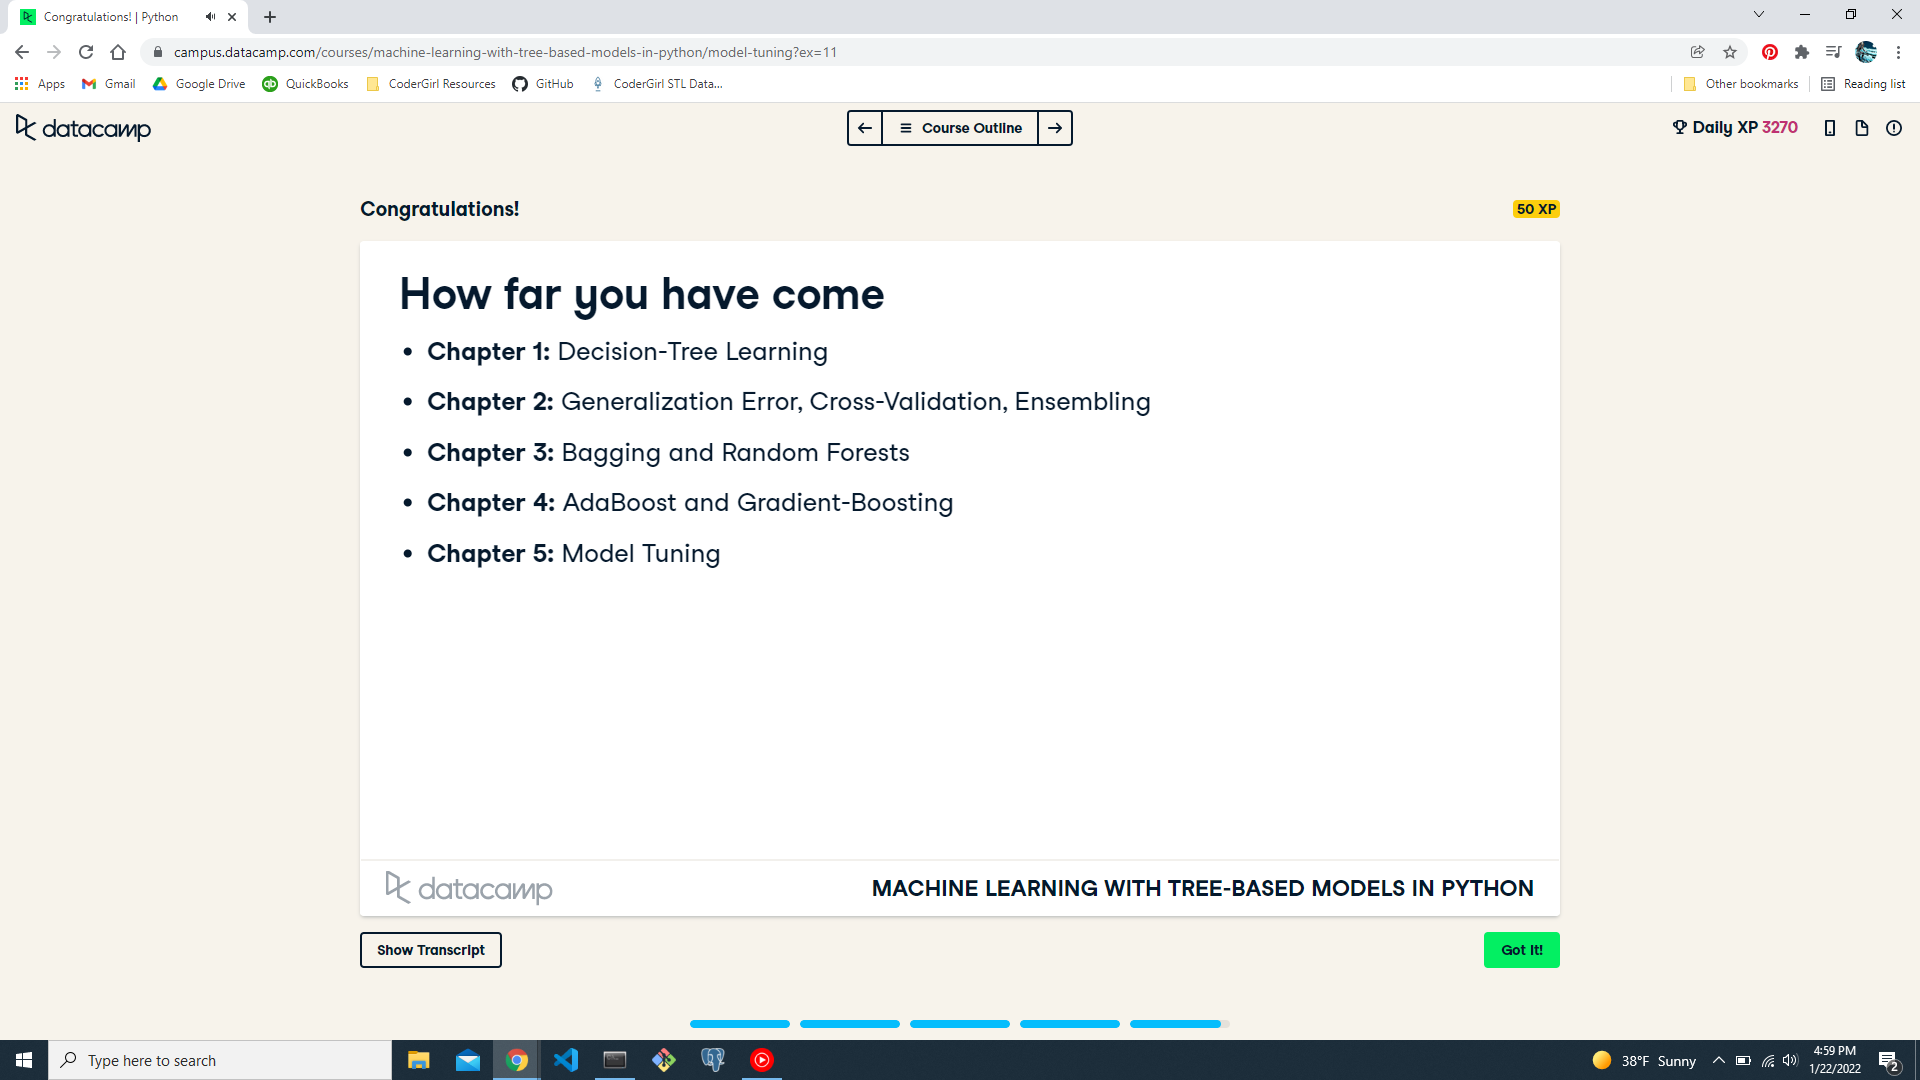

## CHAPTER 1 - Classification and Regression Trees

Classification tree learns a sequence of if-else question about individual features in order to infer class labels
- able to capture non-linear relationships
- don't require scaling
        from sklearn.tree import DecisionTreeClassifier
        from sklearn.model_selection import train_test_split
        from sklearn.metrics import accuracy_score
       
        train test split
        dt = DecisionTreeClassifier(max_depth=2, random_state=1)
        dt.fit(Xtrain, ytrain)
        y_pred = dt.predict(Xtest)
        accuracy_Score(ytest, ypred)
        
- Decision Regions - region in the feature space where all instances are assigned to one class label
- Decision Boundary - surface separating different decision regions
- A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.


In [ ]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

In [ ]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

In [ ]:
## Logistic Regression vs Classification Tree

# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers with premade function 
plot_labeled_decision_regions(X_test, y_test, clfs)

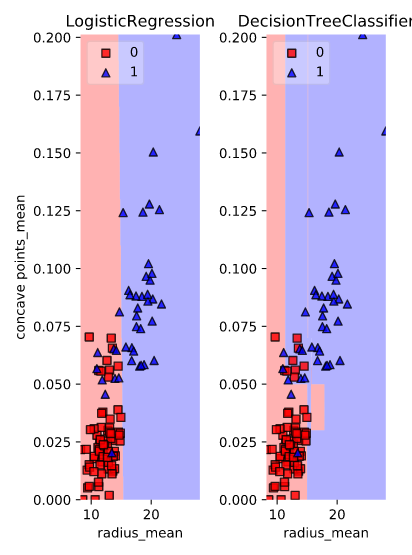

##### Classification Tree Learning

- Decision-Tree - data structure consisting of heirarchy of nodes
- Node - question or prediction
- Root - node at which the decision tree starts growing, no parent nodes, two children nodes
- Internal Node - one parent node, two children nodes
- Leaf - one parent node, no children, prediction

- tree is trained in such a way that a class label predominates each leaf

Information Gain (IG)
- at each parent node the decision tree ask a question about a feature related to a split point
- how does it know which feature and split point to pick? IG
- each node maximixes the information gain obtained after each split
- criteria used to measure the impurity of a node (gini index, entropy, etc)

Classification Tree Learning
- nodes grown recursively, ie, node exists based on the state of its predecessors
- each node splits the data based on feature  and split point to maximize IG for the node
- if IG(node) = 0, declare the node a leaf
- can constrain the maximum depth of a tree to override this default

In [ ]:
## Using entropy as a criterion

## Most of the time, the gini index and entropy lead to the same results. 
## The gini index is slightly faster to compute and is the default 
## criterion used in the DecisionTreeClassifier model of scikit-learn.

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8,criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

##### Decision-Tree for Regression

target value is continuous for regression

        from sklearn.tree import DecisionTreeRegressor
        from sklearn.metrics import mean_squared_error as MSE
        
        train test split
        #min_samples_leaf - each leaf should contain at least 10% of training data
        dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state)
        dt.fit(Xtrain, ytrain)
        y_pred = dt.predict(Xtest)
        mse_dt = MSE(ytest, ypred)
        #compute RMSE
        rmse_dt = mse_dt **(1/2)
        rmse_dt

- the impurity of a training set node is measured using the MSE of the targets in that node
- regression tree trys to find the splits that produce leaves where in each leaf the target values are on average the closest possible to the mean-value of the labels in that particular leaf
- as a new instance traverses the tree and reaches a certain leaf, it's target variable is computed as the average of the target variables contained in each leaf

In [ ]:
## Train Regression Tree

# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

In [ ]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt ** (1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

In [ ]:
## Linear regression vs regression tree

# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr ** (1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

## CHAPTER 2 - The Bias-Variance Tradeoff

Overfitting - high train accuracy, low test accuracy
Underfitting - low train and low test accuracy

- generalization error tell you how much the model generalizes on unseen data
- generalization error = bias ^2 + variance + irreducible error (error contribution of noise, constant)
    - as bias increase, variance decreases
    - as gneralization decreases, bias decreases
    - as generalization increases, variance increases

- Diagnosing bias an dvariance problems
    - estimating the generalization error (cannot be done directly) - always split data to evaluate error on test set
    - cross-validation only used to evaluate final performance
        - K-Fold CV 
        - Hold-Out CV

K-Fold CV
- training set split into k equal partitions(folds)
- error of f(hat) is evaluated k times, resulting in a list of k number of errors
- CV error is the mean of all errors

Diagnosing Variance Problems
- check against the training set; if CV error of f^ > training set error of f^ then the model has high variance
    - overfit, decrease model complexity (decrease max depth, increase min samples per leaf), gather more data
    
Diagnose Bias Problems
- CV error of f^ is approximately = training set error of f^ and both are much greater than the desired error
    - underfit, increase model complexity (increase max depth, decrease min samples per leaf), gather more relevatn features
    
K-Fold CV in sklearn
- A very good practice is to keep the test set untouched until you are confident about your model's performance. CV is a great technique to get an estimate of a model's performance without affecting the test set.

        from sklearn.tree import DecisionTreeClassifier
        from sklearn.model_selection import train_test_split, cross_val_score
        from sklearn.metrics import mean_squared_error as MSE
        
        train test split
        dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.14, random_state)
        MSE_CV = - cross_val_score(dt, Xtrain, ytrain, cv=10, 
                                   scoring='neg_mean_squared_error', 
                                   n_jobs= -1)
        #result is an array of the 10 negative MSE acheieved on the 10 folds
        dt.fit()
        y_predict_train=
        y_predict_test=
        
        MSE_CV = MSE_cv.mean 
        train_mse = MSE(ytrain, y_predict_train)
        test_mse = MSE(ytest, y_predict_test)

In [ ]:
## Instantiate the model

# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

In [ ]:
## Evaluate the 10-fold CV error

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

In [ ]:
## Evaluate the training error

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

## Notice how the training error is roughly equal to the 
## 10-folds CV error you obtained in the previous exercise.

In [ ]:
## High bias or high variance?
## baseline_RMSE corresponds to the RMSE achieved by the regression-tree 
## trained with the disp feature only 
## it serves as the baseline RMSE above which a model is considered 
## to be underfitting and below which the model is considered 'good enough'.

In [1]:
RMSE_train
Out[1]:
5.15

In [2]:
RMSE_CV
Out[2]:
5.14

In [3]:
baseline_RMSE
Out[3]:
5.1

## dt suffers from high bias because RMSE_CV approximately equals RMSE_train 
## and both scores are greater than baseline_RMSE.

##### Ensemble Learning

CARTS - Classification and Regression Tree Models
- BENEFITS
    - simple to understand and interpret
    - easy to use
    - flexible - can describe non-linear dependencies
    - simple - preprocessing does not require standardizing or normalizaing features
- LIMITATIONS 
    - classification can only produce orthogonal decision boundaries
    - sensitive to small variations in training set
    - high variance - unconstrained CARTs can overfit training set
- SOLUTION - ensemble learning
    - train different models on same dataset, each makes predictions
    - meta-model aggregates predictions
    - final prediction is more robust and less prone to errors
    - best results when models are skilful in different ways
- Example
training set > Decision Tree, Logistic Regression, Knn, etc > predictions from each model > aggregate Meta-model > final ensemble prediction

Ensemble LEarning in Practice: Voting Classifier
    0 binary classification task
    - N classifiers make predictions of 0 or 1
    - meta-model output predictions by hard voting (majority voting)
    
        from sklearn.metrics import accuracy_score
        from sklearn.model_selection import train_test_split
        from sklearn.linear_model import LogisticRegression
        from sklearn.tree import DecisionTreeClassifier
        from sklearn.neighbors import KNeighborsClassifier as KNN
        from sklearn.ensemble import VotingClassifier
        
        train test split
        lr=LogisticREgression(random_state)
        knn=KNN()
        dt=DecisionTreeClassifier(random_state)
        
        classifiers = [('LogReg', lr), ('KNN', knn), ('Tree', dt)]
        
        #write for loop to iterate over classifiers
        for clf_name, clf in classifiers:
            clf.fit(Xtrain, ytrain)
            y_pred = clf.predict(Xtest)
            print('{:s} : {:.3f}'.format(clf_name, accuracy_score(ytest, ypred)))
            
         #instantiate voting classifier
         vc=VotingClassifier(estimators=classifiers)
         vc.fit(Xtrain, ytrain)
         ypred = vc.predict(Xtest)
         print('Voting Classifier: {.3f}'.format(accuracy_score(ytest,ypred)))
         
         # accuracy of voting classifier is higher than any one model in ensemble

In [ ]:
## Define the ensemble

# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

In [ ]:
## Evaluate individual classifiers

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))
    
OUTPUT:
Logistic Regression : 0.747
K Nearest Neighbours : 0.724
Classification Tree : 0.730

In [ ]:
## Better performance with a Voting Classifier

# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

OUTPUT:
Voting Classifier: 0.753

## CHAPTER 3 - BAGGING AND RANDOM FORESTS

##### Bagging

An ensemble method called Bootstrap aggregation / Bagging
- Voting Method uses many different algorithms on the same training set
- Bagging uses one algorithm on many different subsets of the training set
- Bagging stands for Bootstrap Aggregation
- reduces variance of individual models in the ensemble

pulls samples with replacement that are the same length of the dataset, to train N number of models (same model)
- predictions are aggregated (bagging)
- final prediction is obtained by majority voting for Classification and averaging for Regression

Bagging Classifier
        from sklearn.metrics import accuracy_score
        from sklearn.model_selection import train_test_split
        from sklearn.tree import DecisionTreeClassifier
        from sklearn.ensemble import BaggingClassifier
        
        train test split, stratify = y
        dt = DecisionTreeClassifier(max_depth=4, min_smaples_leaf=0.16, rantom_state)
        bc=BaggingClassifier(base_estimator=dt, n_estimator=300, n_jobs=-1)
        bc.fit
        y_pred
        accuracy

In [ ]:
## Define the bagging classifier

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

In [ ]:
## Evaluate Bagging Performance

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

OUTPUT:
0.71

## A single tree dt would have achieved an accuracy of 63%

##### Out of Bag Evaluation

Out of Bag (OOB) Evaluation
- On average 63% of the training instances are sampled
- the remaining 37% constitute OOB instances
- can evaluate the OOB instances on the model with no need for cross validation

        from sklearn.metrics import accuracy_score
        from sklearn.model_selection import train_test_split
        from sklearn.tree import DecisionTreeClassifier
        from sklearn.ensemble import BaggingClassifier
        
        train test split, stratify = y
        dt = DecisionTreeClassifier(max_dept=4, min_samples_lef = 0.16, random_state)
        bc = BaggingClassifier(base_estimator=dt, n_estimators=300, oob_score=True, n_jobs=-1)
        bc.fit
        y_pred
        test_accuracy  # 93.6%
        oob_accuracy = bc.oob_score_  # 92.5% 

In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

In [ ]:
## OOB Score vs Test Set Score

# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

OUTPUT:
Test set accuracy: 0.698, OOB accuracy: 0.704

##### Random Forests (RF)

Review Bagging:
- base estimator can be DecisionTree, LogReg, Neural Net, etc.
- each estimator is trained on distinct bootstrap sample of training set
- estimators use all features for training and prediction

Random Forests:
- also ensemble method
- base estimator is Decision Tree
- each estimator is trained on distinct bootstrap sample having same size as training set
- RF introduces further randomization in training of individual trees
- d features are sampled at each node without replacement (d < total number features) default d = square root of number of features

RF PRediction
- each model outputs a prediction
- classification meta-model uses majority voting
- regression meta-model uses averaging
- generally achieves lower variance that individual decision tree

        from sklearn.metrics import mean_squared_error as MSE
        from sklearn.model_selection import train_test_split
        from sklearn.ensemble import RandomForestRegressor
        
        train test split
        rf = RandomForestRegressor(n_estimators=400, min_samples_leaf = 0.12, random_state)
        rf.fit
        rf.predict
        rmse_test = MSE(ytest, ypred)**(1/2)
        
Feature Importance
- tree based methods enable measuring the importance of each feature in prediction
- in sklearnL how much the tree nodes usa a particular feature(weighted average) to reduce impurity
- can extract feature importances with attribute feature_importances_
        importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
        sorted_importances_rf = importances_rf.sort_values()
        #make horizontal barplot
        sorted_importances_rf.plot(kind='barh', color='lightgreen'); plt.show()

In [ ]:
## Train an RF regressor

# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

In [ ]:
## Evaluate the RF regressor

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

In [ ]:
##Visualizing features importances

# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

## CHAPTER 4 - BOOSTING

##### Adaboost

Boosting
- many predictors trained, each learns from the errors of its predecessor
- several weak learners combined to form strong learner
- weak learner - model doing slightly better than random guessing
- two methods: AdaBoost (Adaptive Boosting), Gradient Boosting
- often used with CARTs, but does not have to be

Adaboost
- each predictor pays more attention to the instances wrongly predicted by predessor
- achieved by changing the weights of training instances
- each predictor is assigned a coefficient alpha
- alpha depends on the predictor's training error
- repeated until N predictors are trained

- learning rate: eta (0-1) is used the shirnk coefficient alpha, smaller eta should be compensated for a greater number of estimators

Prediction:
- classification AdaBoostClassifier with weighted majority voting
- regression AdaBoostRegressor with weighted average
        
        from sklearn.ensemble import AdaBoostClassifier
        from sklearn.model_selection import train_test_split
        from sklearn.tree import DecisionTreeClassifier
        from sklearn.metrics import roc_auc_score
        
        train-test-split
        dt=DecisionTreeClassifier(max_depth=1, random_state_
        adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)
        adb_clf.fit(X_train, y_train)
        #predict probability of obtaining positive class
        y_pred_proba = adb.clf.predict_proba(X_test)[:,1]
        #evaluate test-set roc_auc_score
        adb_cls_roc_auc_score = roc_auc(ytest, ypredproba)

In [ ]:
## Define the AdaBoost classifier

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

In [ ]:
## Train the AdaBoost classifier

# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

In [ ]:
## Evaluate the AdaBoost classifier

# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

##### Gradient Boosting (GB)

Boosting algorithm - sequential correction of predecessor's errors
does not tweak the weights of training instances
each predictor is trained using its predecessor's residual errors as labels
gradient boosted trees : a CART is used as a base learner

shrinkage - prediction of each tree in ensemble is shrunk after it is multiplied by learning rate eta (0-1); same trade off between lowering learning rate and increasing number of estimators

Prediction
- regression GradientBoostingRegressor uses an algorithm for prediction
- classification GradientBoostingClassifier

        from sklearn.ensemble import GradientBoostingRegressor
        from sklearn.model_selection import train_test_split
        from sklearn.metrics import mean_squared_error as MSE
        
        train-test-split
        gbt = GradientBoostingREgressor(n_estimators=300, max_depth=1, random_state)
        gbt.fit
        gbt.predict
        rmse_test(MSE(ytest, ypred)**(1/2)
        

In [ ]:
## Define the GB regressor

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)

In [ ]:
## Train the GB regressor

# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

In [ ]:
## Evaluate the GB regressor

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test ** (1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

##### Stochastic Gradient Boosting (SGB)

GB involves an exhaustive procedure in which each CART is trained to find the best split points and features
- may lead to CARTs using the same split points and maybe same features

mitigate with Stochastic Gradient Boosting
- each CART trained on an random subset of rows 
- features are sampled without replacement
result - further diversity which adds more variance

        from sklearn.ensemble import GradientBoostingRegressor
        from sklearn.model_selection import train_test_split
        from sklearn.metrics import mean_squared_error as MSE
        
        train-test-split
        #subsample, model samples 80% of data for training
        #max_features, each tree uses 20% of available features to perform split
        sgbt = GradientBoostingRegressor(max_depth=1, n_estimators=300, max_features=0.8, subsample=0.8, random_state)
        sgbt.fit
        sgbt.predict
        rmse_test = MSE(ytest, ypred)**(1/2)

In [ ]:
## Regression with SGB

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,                                
            random_state=2)

In [ ]:
## Train the SGB regressor

# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

In [ ]:
## Evaluate the SGB regressor

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE
mse_test = MSE(y_test, y_pred)

# Compute test set RMSE
rmse_test = mse_test ** (1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

##RMSE is lower that the regular GB

## CHAPTER 5 - MODEL TUNING

##### Tuning a CARTs hyperparameters

to obtain best performance, tune hyperparameters

- parameters - learned from data
    - CART example: split point of node, split-feature of node
- hyperparameters - not learned from data, set prior to training
    - CART example: max_depth, min_Samples_lead, criterion
    
- problem: search for set of optimal hyperparameters for learning algorithm
- solution: find set of hyperparameters that result in optimal model
- optimal yield: yields an opitmal score
- score: in sklearn defaults to accuracy (classification) and R^2 (regression)
- cross validation is used to estimate generalization performance

Approaches
- GridSearch (using here)
- RandomSearch
- Bayesian Optimization
- Genetic Algorithms, etc...

GridSearch
- manually set a grid of discrete hyperparameter values
- set a metric for scoring model performance
- search through grid
- evaluate each model's CV score for each set of hyperparameters
- the optimal hyperparameters achieve the best CV score
- larger grids take longer to find solution
        
        from sklearn.tree import DecisionTreeClassifier
        dt=DecisonTreeClassifier(random_state)
        #print hypterparameters
        dt.get_params()
        
        from sklearn.model_selection import GridSearchCV
        params_dt = {'max_depth':[3,4,5,6], 
                     'min_samples_leaf':[0.04,0.06,0.08],
                     'max_features':[0.2,0.4,0.6,0.8]}
                     
        grid_dt = GridSearchCV(estimator=dt, 
                               param_grid=params_dt,
                               scoring='accuracy',
                               cv=10
                               n_jobs=-1)
        grid_dt.fit(Xtrain, ytrain)
        
        #print best parameters
        best_hyperparams = grid_dt.best_params_
        
        #print best accuracy score
        best_CV_score = grid_dt.best_score_
        
        #extract best model from grid_dt
        best_model = grid_dt.best_estimaror_
        
        #evaluate test set accuracy
        test_acc = best_model.score(Xtest, ytest)

In [ ]:
## Tree hyperparameters
## tune the hyperparameters of a classification tree. 
## this dataset is imbalanced, ROC AUC score as a metric instead of accuracy

# Define params_dt
params_dt = {'max_depth':[2,3,4], 'min_samples_leaf':[0.12,0.14,0.16,0.18]}

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

In [ ]:
## Evaluate the optimal tree

# Import roc_auc_score from sklearn.metrics 
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

##### Tuning a RF's Hyperparameters

CART's hyperparameters:
- number of estimators
- bootstrapping 
etc.

hyperparameter tuning can be computationally expensive and lead to only slight improvement sometimes

        from sklearn ensemble import RandomForest Regressor
        rf=RandomForestRegressor(random_state)
        rf.get_params()
        
        from sklearn.metrics import mean_squared_error as MSE
        from sklearn.model_selection import GridSearchCV
        
        params_rf = {'n_estimators':[300,400,500],
                     'max_depth':[4,6,8],
                     'min_samples_leaf':[0.1,0.2],
                     'max_features':['log2', 'sqrt']}
        
        #verbose shows messages during fitting)
        grid_rf = GRidSearchCV(estimator=rf, param_grid = params_rf, cv=3,
                               scoring='neg_mean_squared_error', 
                               verbose=1, n_jobs=-1)
        grid_rf.fit(Xtrain, ytrain)
        
        best_hyperparams = grid_rf.best_params_
        best_model = grid_rf.best_estimator_
        y_pred = best_model.predict(Xtest)
        rmse_test = MSE(ytest, ypres)**(1/2)
        

In [ ]:
## Set the hyperparameter grid of RF
# Define the dictionary 'params_rf'
params_rf = {'n_estimators':[100,350,500],
             'max_features':['log2', 'auto', 'sqrt'],
             'min_samples_leaf':[2,10,30]}

In [ ]:
## Search for the optimal forest

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

In [ ]:
## Evaluate the optimal forest

# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 